In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
titanic_train = pd.read_csv('titanic.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Text(0.5, 0.875, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(0.2, 0.625, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(0.1, 0.375, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3, 0.375, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(0.2, 0.125, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(0.4, 0.125, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(0.8, 0.625, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(0.7, 0.375, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(0.6, 0.125, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(0.8, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.9, 0.375, 'entropy = 0.996\nsamples = 99\nvalue = [53, 46]')]

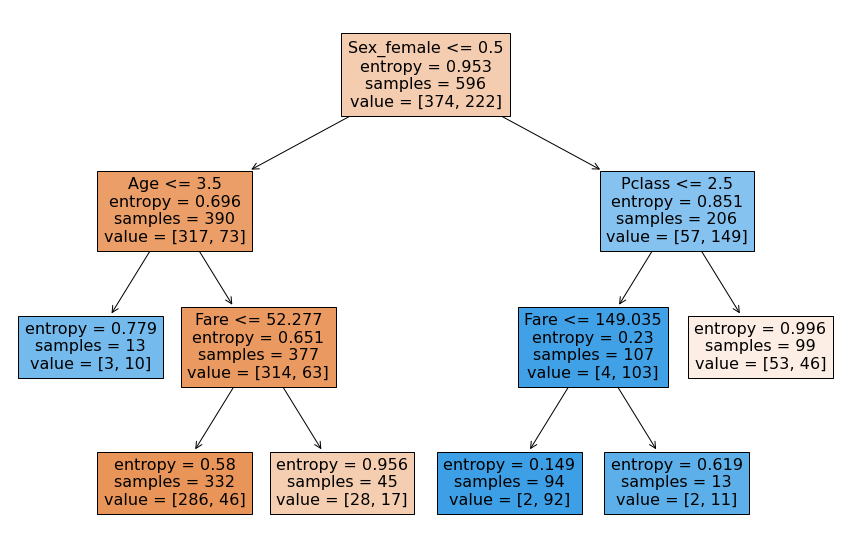

In [13]:
X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived

X = pd.get_dummies(X) # разбиваем колонки на несколько

X = X.fillna({'Age': X.Age.median()}) # заполняем пропуски

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100,min_samples_leaf=10)

clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=list(X))

In [14]:
titanic = titanic_train

In [18]:
titanic["Sex"] = titanic["Sex"].replace("male",1)
titanic["Sex"] = titanic["Sex"].replace("female",0)
X = titanic.drop(['PassengerId','Survived',"Name","Ticket","Cabin"],axis=1)
y = titanic[["Survived"]]
X = pd.get_dummies(X)
X = X.fillna({'Age':X['Age'].median()})
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)#test_size-размер тестового множества

In [20]:
clf = tree.DecisionTreeClassifier()

In [30]:
parametrs = {'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_split':range(40,100,10),'min_samples_leaf':range(5,40,5)}

In [39]:
grid_search_clf = GridSearchCV(clf,parametrs,cv=10)

In [40]:
grid_search_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(5, 40, 5),
                         'min_samples_split': range(40, 100, 10)})

In [41]:
grid_search_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 40}

In [42]:
best_clf = grid_search_clf.best_estimator_

In [43]:
best_clf.score(X_train,y_train)

0.8204697986577181

In [46]:
best_clf.score(X_test,y_test)

0.8169491525423729

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
forest = RandomForestClassifier()

In [72]:
parametrs = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

In [73]:
grid_search_cv_clf = GridSearchCV(forest,parametrs,cv=5)

In [74]:
grid_search_cv_clf.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [75]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [76]:
best_forest = grid_search_cv_clf.best_estimator_

In [77]:
print('Score for tree_clf:',best_clf.score(X_test,y_test))
print('Score for forest_clf:',best_forest.score(X_test,y_test))

Score for tree_clf: 0.8169491525423729
Score for forest_clf: 0.8203389830508474


In [79]:
feauture_importances = best_forest.feature_importances_

In [80]:
feauture_importances_df = pd.DataFrame({'feautures':list(X_train),'feature_importances':feauture_importances})
feauture_importances_df

,feautures,feature_importances
0,Pclass,0.154614
1,Sex,0.427505
2,Age,0.135814
3,SibSp,0.028215
4,Parch,0.018750
5,Fare,0.168211
6,Embarked_C,0.022275
7,Embarked_Q,0.014399
8,Embarked_S,0.030217


In [84]:
feauture_importances_df.sort_values('feature_importances', ascending=False)#как сильно переменные влияли на снижение энтропии

,feautures,feature_importances
1,Sex,0.427505
5,Fare,0.168211
0,Pclass,0.154614
2,Age,0.135814
8,Embarked_S,0.030217
3,SibSp,0.028215
6,Embarked_C,0.022275
4,Parch,0.018750
7,Embarked_Q,0.014399


In [87]:
data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [88]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
np.random.seed(0)
rf = RandomForestClassifier(10,max_depth=5)

In [92]:
X = data.drop('target',axis=1)
y = data['target']

In [93]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [94]:
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

In [95]:
f_i = pd.DataFrame({'feautures':list(X),'feuture_importances_':list(rf.feature_importances_)})
f_i

,feautures,feuture_importances_
0,age,0.043441
1,sex,0.039990
2,cp,0.139983
3,trestbps,0.053569
4,chol,0.056887
5,fbs,0.008493
6,restecg,0.018583
7,thalach,0.129550
8,exang,0.048079
9,oldpeak,0.116645


In [104]:
f_i = f_i.sort_values('feuture_importances_')
f_i

,feautures,feuture_importances_
5,fbs,0.008493
6,restecg,0.018583
1,sex,0.039990
0,age,0.043441
8,exang,0.048079
3,trestbps,0.053569
4,chol,0.056887
10,slope,0.069208
11,ca,0.077048
9,oldpeak,0.116645


<BarContainer object of 13 artists>

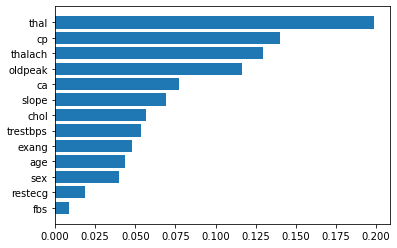

In [105]:
plt.barh(f_i['feautures'],f_i['feuture_importances_'])

## 3.5

In [108]:
training_mush = pd.read_csv('training_mush.csv')
training_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [135]:
X = training_mush.drop('class',axis=1)
y = training_mush['class']

In [122]:
rf = RandomForestClassifier(random_state=0)

In [118]:
grid_search_cv_clf = GridSearchCV(rf,{'n_estimators':range(10,50,10)\
                                                ,'max_depth':range(1,10,2)\
                                                ,'min_samples_split':range(2,9,2)\
                                                ,'min_samples_leaf':range(1,7)}\
                                  ,cv=3)

In [136]:
grid_search_cv_clf.fit(X,y.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [139]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [140]:
est = grid_search_cv_clf.best_estimator_

In [142]:
f_i = est.feature_importances_

In [143]:
f_i_df = pd.DataFrame({'features':list(X),'feature_importances':list(f_i)}).sort_values('feature_importances')

In [144]:
f_i_df

,features,feature_importances
5,gill-attachment,0.000000
15,veil-type,0.000000
0,cap-shape,0.002577
1,cap-surface,0.003130
14,stalk-color-below-ring,0.006253
9,stalk-shape,0.007563
16,veil-color,0.010881
17,ring-number,0.013910
13,stalk-color-above-ring,0.017689
2,cap-color,0.021773


In [149]:
testing_mush = pd.read_csv('testing_mush.csv')
testing_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [151]:
est.predict(testing_mush).sum()#количество съедобных

976

In [158]:
y_pred = est.predict(testing_mush)

In [156]:
import zipfile
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.infolist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd="Cool!Move_forward!".encode('cp850', 'replace')))
y_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [157]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(y_pred,y_true)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

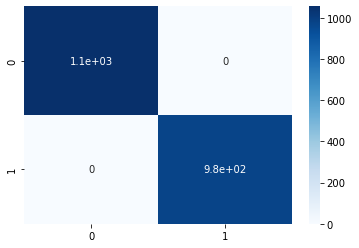

In [162]:
sns.heatmap(confusion_matrix(y_pred,y_true),annot=True,cmap='Blues')

class    976
dtype: int64

In [169]:
invasion = pd.read_csv('invasion.csv')
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [166]:
X = invasion.drop('class',axis=1)
y = invasion['class']

In [167]:
forest = RandomForestClassifier()

In [172]:
grid_search_cv_clf = GridSearchCV(forest,{'n_estimators':[10,20],'max_depth':range(3,20,3),'min_samples_split':(40,100,10),'min_samples_leaf':(5,20,5)})

In [173]:
grid_search_cv_clf.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 20, 3),
                         'min_samples_leaf': (5, 20, 5),
                         'min_samples_split': (40, 100, 10),
                         'n_estimators': [10, 20]})

In [174]:
X_test = pd.read_csv('operative_information.csv')
X_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [175]:
est = grid_search_cv_clf.best_estimator_

In [179]:
predict =est.predict(X_test)

In [184]:
pd.DataFrame({'predict':list(predict),'some':1}).groupby('predict').count()

,some
predict,
cruiser,230
fighter,675
transport,595


In [187]:
pd.DataFrame({'feautres':list(X),'feature_importances':est.feature_importances_}).sort_values('feature_importances',ascending=False)

,feautres,feature_importances
3,brightness,0.310123
0,g_reflection,0.265376
5,volume,0.251167
2,speed,0.101059
1,i_reflection,0.072276
4,time_of_observance,0.000000


In [196]:
space_can_be_a_dangerous_place = pd.read_csv('space_can_be_a_dangerous_place.csv')
space_can_be_a_dangerous_place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [193]:
X = space_can_be_a_dangerous_place.drop('dangerous',axis=1)
y = space_can_be_a_dangerous_place['dangerous']

In [189]:
forest = RandomForestClassifier()

In [192]:
grid_clf = GridSearchCV(forest,{'n_estimators':[10,20],'max_depth':[3,5,7,10],'min_samples_split':[10,20,30,40,100]})

In [194]:
grid_clf.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [10, 20, 30, 40, 100],
                         'n_estimators': [10, 20]})

In [199]:
est  = grid_clf.best_estimator_
f_imp = est.feature_importances_


In [200]:
pd.DataFrame({'features':list(X),'feature_importances':list(f_imp)}).sort_values('feature_importances',ascending=False)

,features,feature_importances
5,buggers_were_noticed,0.606704
6,nearby_system_has_planemo,0.365865
4,black_hole_is_near,0.016739
0,r,0.003221
3,dustiness,0.003127
2,peradventure_index,0.002557
1,phi,0.001787


In [202]:
space_can_be_a_dangerous_place[['black_hole_is_near', 'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous']].corr()

,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
black_hole_is_near,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.002661,-0.003031,1.000000,0.299508
dangerous,0.052968,0.344469,0.299508,1.000000
